# EDA 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Data/british_airways_cleaned.csv')
df.head()

,Review_Date,Review_Year,Review_Month,Flown_Date,Flown_Year,Flown_Month,Comment,Full_review,Reviewer_Name,Reviewer_Country,...,Seat_Type,Seat_Rating,Cabin_staff_service_Rating,Food_Beverages_Rating,Inflight_Rating,Ground_service_Rating,Value_Rating,Rating,Recommended,Verified
0,2024-03-26,2024,3,2024-03-01,2024,3,“didn't find the crew particularly welcoming”,"A last minute business trip to HND, a route I ...",Troy Robinson,United Kingdom,...,Business Class,5,2,5,5,3,4,8,YES,YES
1,2024-03-26,2024,3,2024-03-01,2024,3,"""I would say disappointing""",Overall I would say disappointing. Due to BA s...,R Norton,United Kingdom,...,Economy Class,4,3,2,2,1,3,5,YES,YES
2,2024-03-25,2024,3,2024-02-01,2024,2,"""Exceptional flight""",LHR to Delhi in Business. Exceptional flight. ...,Paul Lee,United Kingdom,...,Business Class,5,5,5,5,5,5,10,YES,NO
3,2024-03-25,2024,3,2024-03-01,2024,3,"""Cabin crew attentive and bubbly""",Efficient and Smooth flight from start to fini...,Paul Lee,United Kingdom,...,Economy Class,5,5,5,2,4,5,9,YES,NO
4,2024-03-25,2024,3,2024-03-01,2024,3,“a terrible and unnecessary experience”,Was told we can not take hand luggage onto the...,Peter Buchanan,United Kingdom,...,Economy Class,3,3,2,2,3,2,3,NO,YES


In [4]:
df.columns

Index(['Review_Date', 'Review_Year', 'Review_Month', 'Flown_Date',
       'Flown_Year', 'Flown_Month', 'Comment', 'Full_review', 'Reviewer_Name',
       'Reviewer_Country', 'Origin', 'Destination', 'Aircraft', 'Travel_Type',
       'Seat_Type', 'Seat_Rating', 'Cabin_staff_service_Rating',
       'Food_Beverages_Rating', 'Inflight_Rating', 'Ground_service_Rating',
       'Value_Rating', 'Rating', 'Recommended', 'Verified'],
      dtype='object')

In [5]:
date_cols = [i for i in df.columns if i.endswith('Date')]
cat_cols = [i for i in df.columns if df[i].dtype=='O' and i not in date_cols]
num_cols = [i for i in df.columns if df[i].dtype!='O' and i not in date_cols]

In [6]:
[df[i].dtype for i in date_cols]

[dtype('O'), dtype('O')]

In [7]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df['Flown_Date'] = pd.to_datetime(df['Flown_Date'])

In [8]:
[df[i].dtype for i in date_cols]

[dtype('<M8[ns]'), dtype('<M8[ns]')]

In [9]:
# Free Grain Sentiment Analysis - Comments
# Aspect Base Sentiment Analysis - Full_Review

In [10]:
b_a_c_indexes = df[df[cat_cols[0]].str.startswith('British')]['Comment'].index # There are 176 Comments are British 

In [11]:
b_a_c_indexes

Index([ 626,  682,  961, 1051, 1060, 1081, 1106, 1271, 1400, 2499,
       ...
       2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980],
      dtype='int64', length=170)

# 1 Sentiment Analysis of Comments, Full_Review by Using NLTK

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
def Sentiment_Analysis(review):
    scores = sid.polarity_scores(str(review))    
    if scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment

In [15]:
df['Comment'] = df['Comment'].apply(Sentiment_Analysis)

In [16]:
df['Full_review'] = df['Full_review'].apply(Sentiment_Analysis)

In [17]:
df.head()

,Review_Date,Review_Year,Review_Month,Flown_Date,Flown_Year,Flown_Month,Comment,Full_review,Reviewer_Name,Reviewer_Country,...,Seat_Type,Seat_Rating,Cabin_staff_service_Rating,Food_Beverages_Rating,Inflight_Rating,Ground_service_Rating,Value_Rating,Rating,Recommended,Verified
0,2024-03-26,2024,3,2024-03-01,2024,3,Neutral,Positive,Troy Robinson,United Kingdom,...,Business Class,5,2,5,5,3,4,8,YES,YES
1,2024-03-26,2024,3,2024-03-01,2024,3,Negative,Negative,R Norton,United Kingdom,...,Economy Class,4,3,2,2,1,3,5,YES,YES
2,2024-03-25,2024,3,2024-02-01,2024,2,Neutral,Positive,Paul Lee,United Kingdom,...,Business Class,5,5,5,5,5,5,10,YES,NO
3,2024-03-25,2024,3,2024-03-01,2024,3,Neutral,Positive,Paul Lee,United Kingdom,...,Economy Class,5,5,5,2,4,5,9,YES,NO
4,2024-03-25,2024,3,2024-03-01,2024,3,Negative,Negative,Peter Buchanan,United Kingdom,...,Economy Class,3,3,2,2,3,2,3,NO,YES


In [18]:
df.iloc[b_a_c_indexes]['Comment'].unique() # Considering British Airways 

array(['Neutral'], dtype=object)

# 2.Exploratory Data Analysis

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.shape

(2981, 24)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Review_Date                 2981 non-null   datetime64[ns]
 1   Review_Year                 2981 non-null   int64         
 2   Review_Month                2981 non-null   int64         
 3   Flown_Date                  2981 non-null   datetime64[ns]
 4   Flown_Year                  2981 non-null   int64         
 5   Flown_Month                 2981 non-null   int64         
 6   Comment                     2981 non-null   object        
 7   Full_review                 2981 non-null   object        
 8   Reviewer_Name               2981 non-null   object        
 9   Reviewer_Country            2981 non-null   object        
 10  Origin                      2981 non-null   object        
 11  Destination                 2981 non-null   object      

In [22]:
df.describe()

,Review_Date,Review_Year,Review_Month,Flown_Date,Flown_Year,Flown_Month,Seat_Rating,Cabin_staff_service_Rating,Food_Beverages_Rating,Inflight_Rating,Ground_service_Rating,Value_Rating,Rating
count,2981,2981.000000,2981.000000,2981,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,2018-08-18 05:24:36.954042112,2018.114056,6.702113,2018-07-13 07:52:54.907749120,2018.049648,6.784971,2.783630,3.163703,2.522643,2.394834,2.783630,2.528346,4.404562
min,2015-06-12 00:00:00,2015.000000,1.000000,2014-07-01 00:00:00,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2016-08-01 00:00:00,2016.000000,4.000000,2016-07-01 00:00:00,2016.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2017-10-25 00:00:00,2017.000000,7.000000,2017-10-01 00:00:00,2017.000000,7.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000
75%,2019-12-08 00:00:00,2019.000000,10.000000,2019-11-01 00:00:00,2019.000000,10.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,7.000000
max,2024-03-26 00:00:00,2024.000000,12.000000,2024-03-01 00:00:00,2024.000000,12.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000
std,NaN,2.612131,3.463011,NaN,2.611709,3.424211,1.326478,1.455851,1.347347,1.120924,1.442574,1.442041,3.117826


In [23]:
for i in df[num_cols]:
    print(i,"------>",df[i].unique(),"------>",df[i].nunique())

Review_Year ------> [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015] ------> 10
Review_Month ------> [ 3  2  1 12 11 10  9  8  7  6  5  4] ------> 12
Flown_Year ------> [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014] ------> 11
Flown_Month ------> [ 3  2  6  9  1 11 10 12  7  8  4  5] ------> 12
Seat_Rating ------> [5 4 3 2 1] ------> 5
Cabin_staff_service_Rating ------> [2 3 5 4 1] ------> 5
Food_Beverages_Rating ------> [5 2 3 1 4] ------> 5
Inflight_Rating ------> [5 2 4 1 3] ------> 5
Ground_service_Rating ------> [3 1 5 4 2] ------> 5
Value_Rating ------> [4 3 5 2 1] ------> 5
Rating ------> [ 8  5 10  9  3  7  1  2  6  4] ------> 10


In [24]:
df.describe(include='object')

,Comment,Full_review,Reviewer_Name,Reviewer_Country,Origin,Destination,Aircraft,Travel_Type,Seat_Type,Recommended,Verified
count,2981,2981,2981,2981,2981,2981,2981,2981,2981,2981,2981
unique,3,3,2389,69,296,473,202,4,4,2,2
top,Neutral,Positive,David Ellis,United Kingdom,London,London,A320,Couple Leisure,Economy Class,NO,NO
freq,1185,1625,39,1841,544,438,1406,1014,1615,1913,1778


In [25]:
df.isnull().sum()

Review_Date                   0
Review_Year                   0
Review_Month                  0
Flown_Date                    0
Flown_Year                    0
Flown_Month                   0
Comment                       0
Full_review                   0
Reviewer_Name                 0
Reviewer_Country              0
Origin                        0
Destination                   0
Aircraft                      0
Travel_Type                   0
Seat_Type                     0
Seat_Rating                   0
Cabin_staff_service_Rating    0
Food_Beverages_Rating         0
Inflight_Rating               0
Ground_service_Rating         0
Value_Rating                  0
Rating                        0
Recommended                   0
Verified                      0
dtype: int64

In [26]:
df[df.duplicated()]

,Review_Date,Review_Year,Review_Month,Flown_Date,Flown_Year,Flown_Month,Comment,Full_review,Reviewer_Name,Reviewer_Country,...,Seat_Type,Seat_Rating,Cabin_staff_service_Rating,Food_Beverages_Rating,Inflight_Rating,Ground_service_Rating,Value_Rating,Rating,Recommended,Verified
2424,2016-03-20,2016,3,2016-03-01,2016,3,Negative,Positive,A Asprakis,United States,...,Economy Class,1,5,1,3,3,1,3,NO,NO


In [27]:
df.shape

(2981, 24)

In [28]:
temp = df[df.duplicated()].index
df.drop(labels=temp,inplace=True)

In [29]:
df.shape

(2980, 24)

# 2.1 Outlier Detection

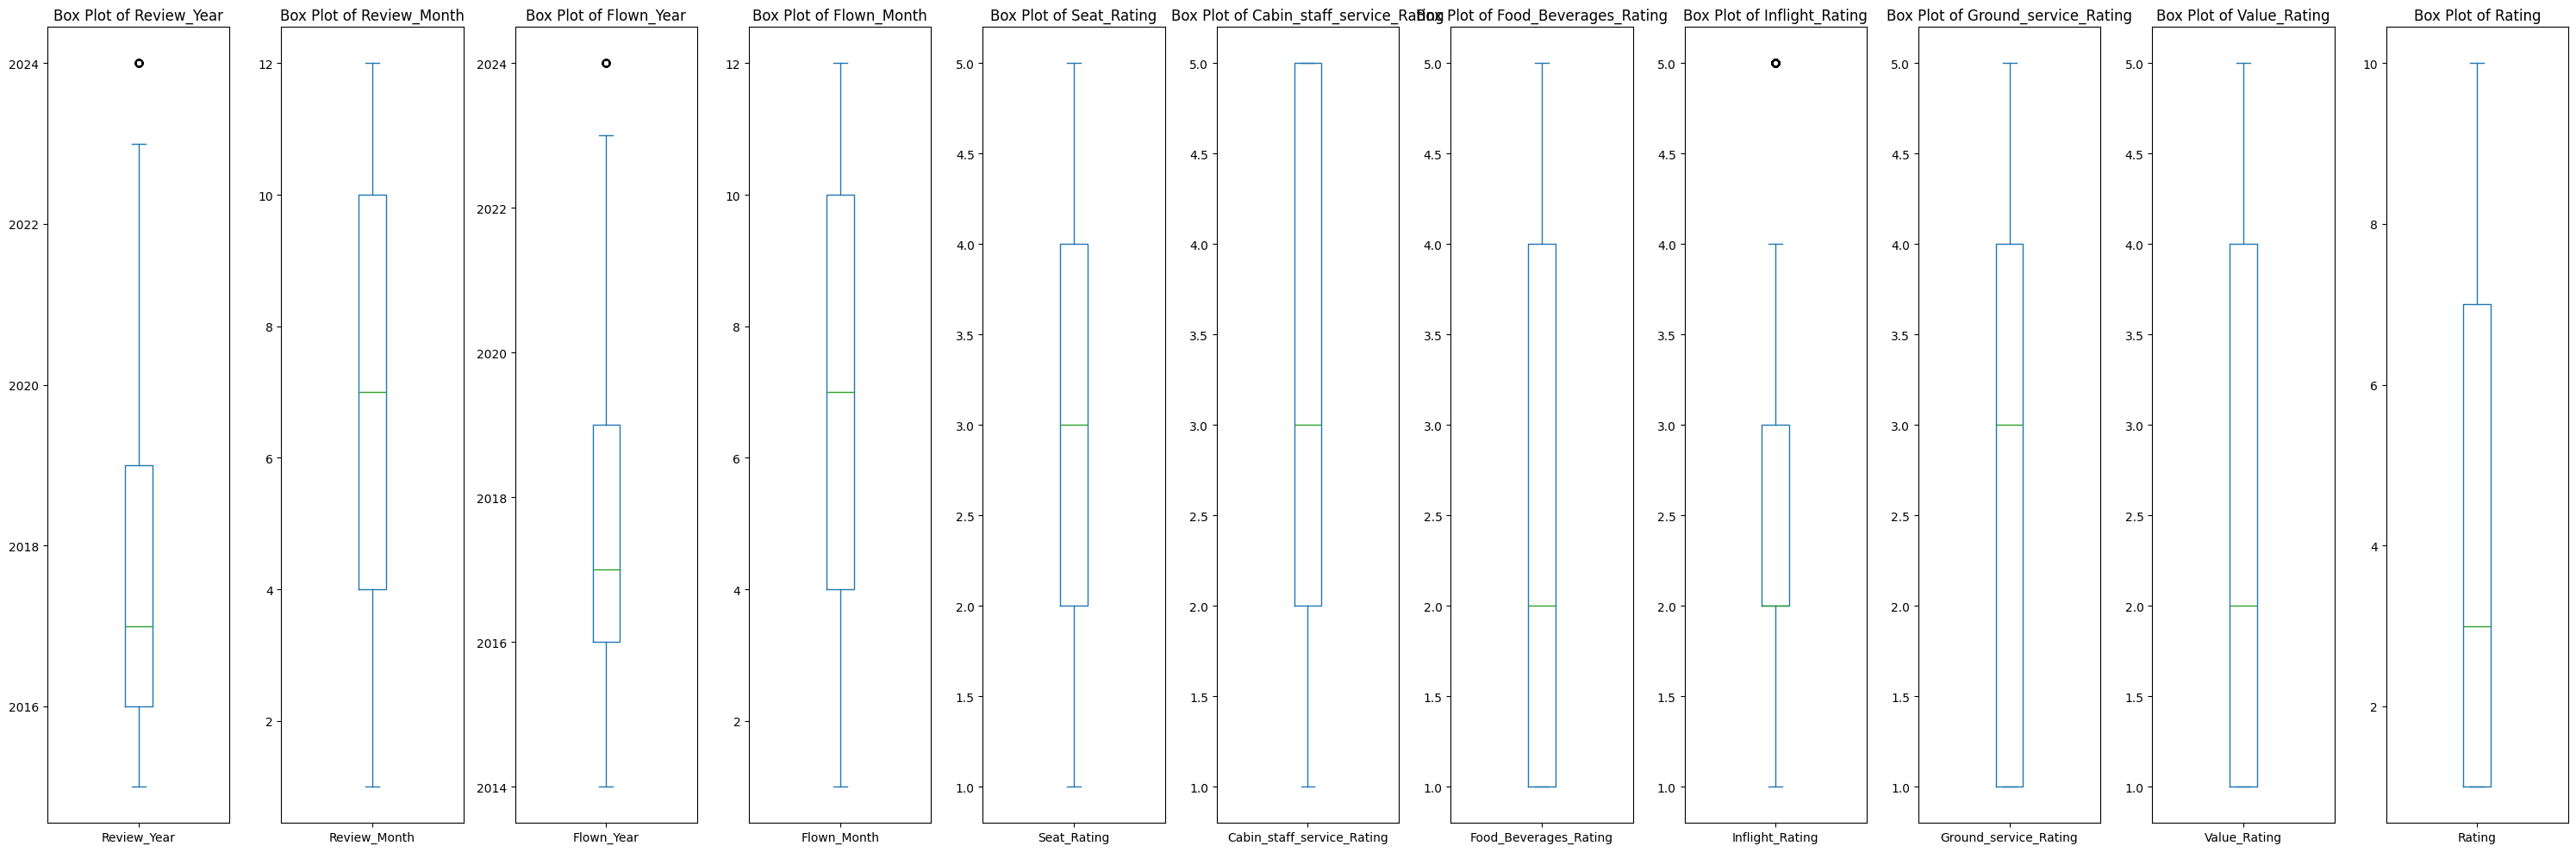

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(30, 10))  # Adjust the figsize as needed

# Iterate over numerical columns and create box plots
for i, col in enumerate(num_cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_title('Box Plot of ' + col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Here we have some outliers in Inflight_Rating columns
# Review_Year, Flown_Year values are not outliers here they are just year numbers

In [32]:
def find_outliers_using_iqr(col):
    q1,q3 = np.percentile(df[col],25),np.percentile(df[col],75)
    iqr = q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    lower_bound,upper_bound
    if df[~(df[col]>lower_bound) | ~(df[col]<upper_bound)].shape[0]:
        return 'Outliers Found',df[~(df[col]>lower_bound) | ~(df[col]<upper_bound)].index
    else:
        return 'No Outliers Found'

In [33]:
outliers_indexes = find_outliers_using_iqr('Inflight_Rating')

In [34]:
df.drop(labels=outliers_indexes[1],inplace=True)

In [35]:
df.shape

(2767, 24)

# 2.2 Univariate Analysis

In [36]:
# Histograms

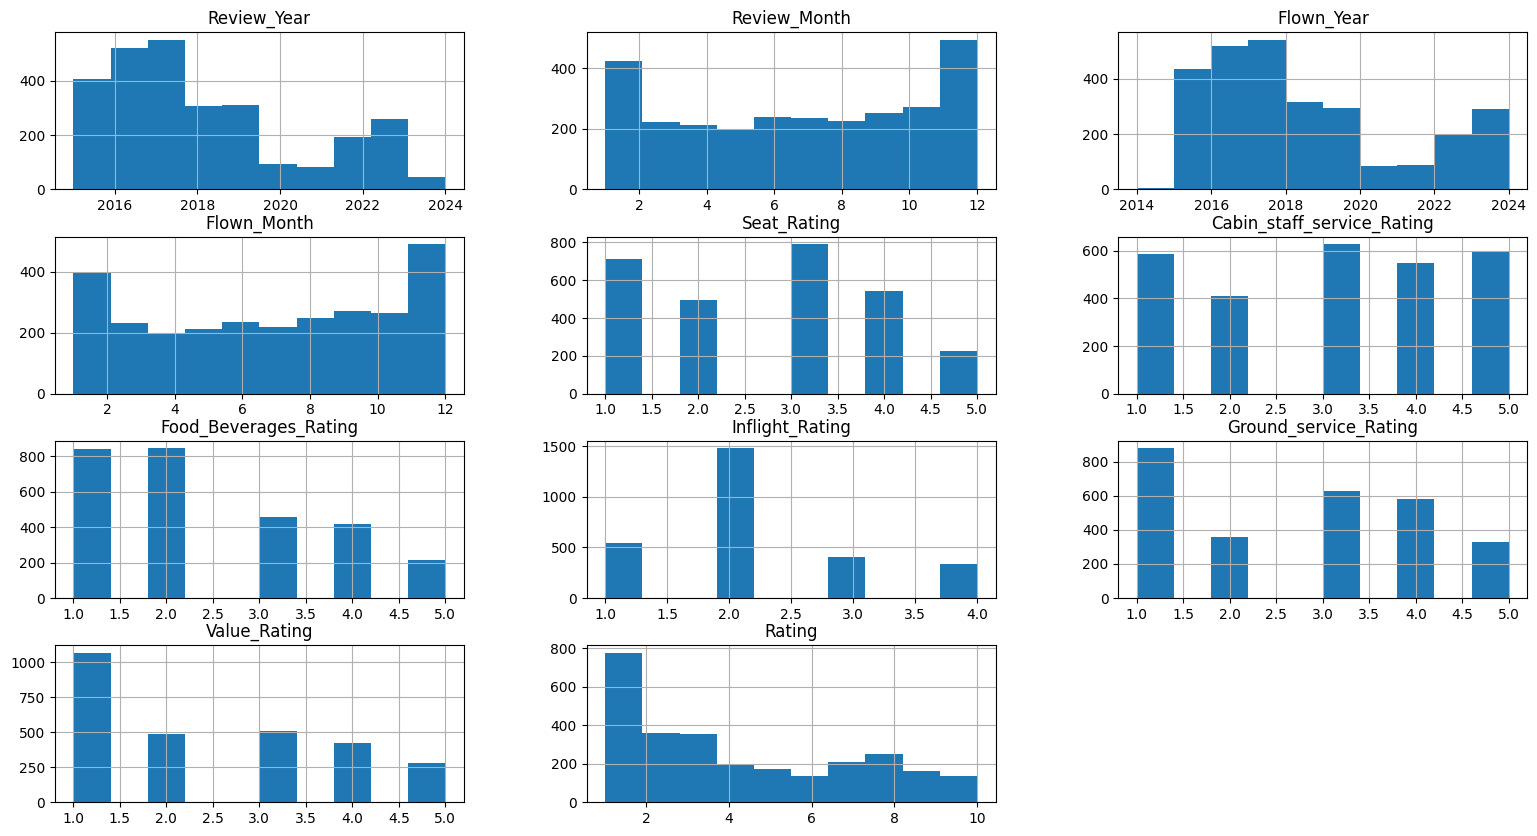

In [37]:
fig, ax = plt.subplots(figsize=(19, 10))
df[num_cols].hist(ax=ax)
ax.set_title('Box Plot of Numerical Columns')
ax.set_ylabel('Value')
ax.set_xlabel('Columns')
plt.show()

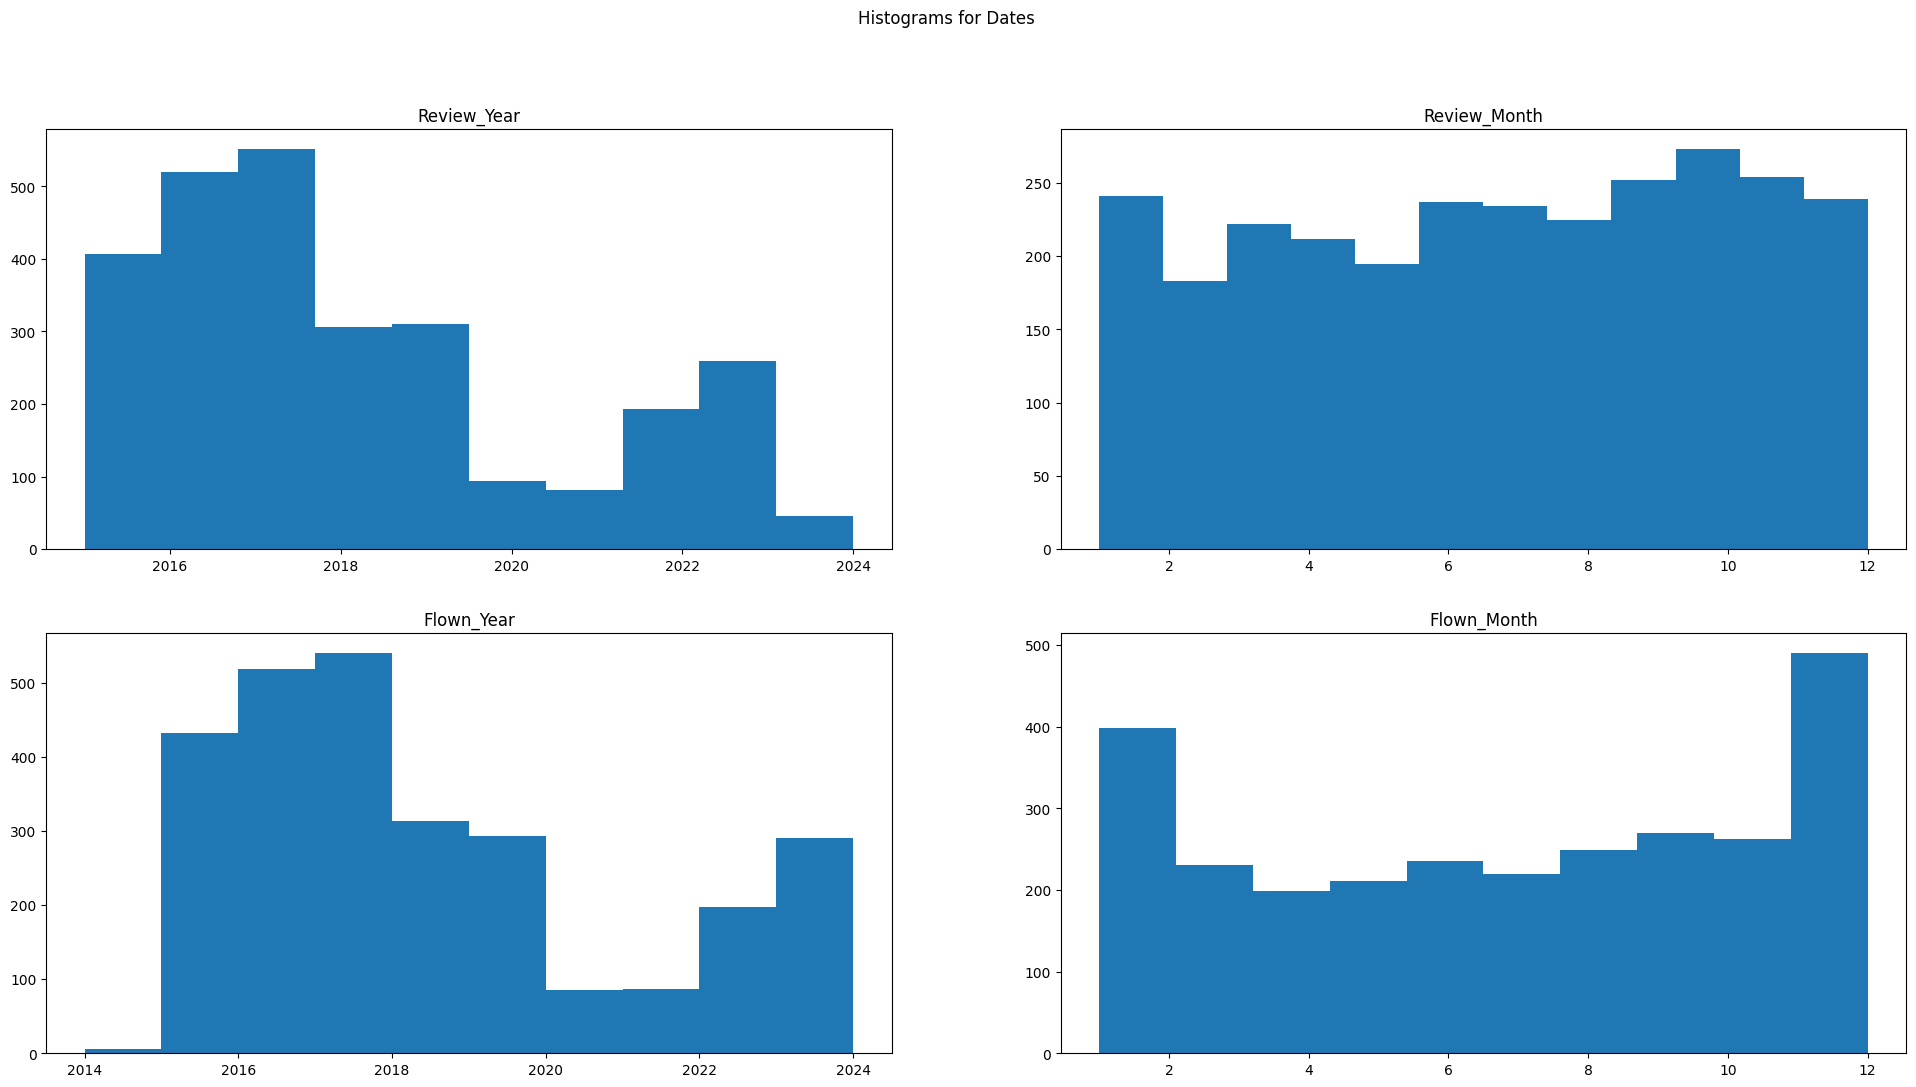

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(24, 12))

# Plot histogram in each subplot
axs[0, 0].hist(df['Review_Year'])
axs[0, 0].set_title('Review_Year')

axs[0, 1].hist(df['Review_Month'],bins=12)
axs[0, 1].set_title('Review_Month')

axs[1, 0].hist(df['Flown_Year'])
axs[1, 0].set_title('Flown_Year')

axs[1, 1].hist(df['Flown_Month'])
axs[1, 1].set_title('Flown_Month')

plt.suptitle('Histograms for Dates')
plt.show()

- There is clear spike in Festive season bookings in every year (Jan,Feb,Nov,Dec)

In [46]:
pd.set_option('display.max_columns',24)
round(df[df['Flown_Month'].isin([1,2,11,12])].shape[0]/df.shape[0]*100,2)

32.13

- There is 32% of people travelled in Festive Season 

In [41]:
def target_variable(month):
    if month in [1,2,11,12]:
        return 1
    else:
        return 0

In [42]:
df['Target'] = df['Flown_Month'].apply(target_variable)

In [43]:
df.head(3)

,Review_Date,Review_Year,Review_Month,Flown_Date,Flown_Year,Flown_Month,Comment,Full_review,Reviewer_Name,Reviewer_Country,Origin,Destination,...,Travel_Type,Seat_Type,Seat_Rating,Cabin_staff_service_Rating,Food_Beverages_Rating,Inflight_Rating,Ground_service_Rating,Value_Rating,Rating,Recommended,Verified,Target
1,2024-03-26,2024,3,2024-03-01,2024,3,Negative,Negative,R Norton,United Kingdom,Lisbon,London,...,Business,Economy Class,4,3,2,2,1,3,5,YES,YES,0
3,2024-03-25,2024,3,2024-03-01,2024,3,Neutral,Positive,Paul Lee,United Kingdom,London,Milan,...,Couple Leisure,Economy Class,5,5,5,2,4,5,9,YES,NO,0
4,2024-03-25,2024,3,2024-03-01,2024,3,Negative,Negative,Peter Buchanan,United Kingdom,Madrid,London Heathrow,...,Couple Leisure,Economy Class,3,3,2,2,3,2,3,NO,YES,0


# 2.3 Bivariate Analysis

In [58]:
clables, cvalues = df['Comment'].value_counts().index,df['Comment'].value_counts().values
clables,cvalues

(Index(['Neutral', 'Negative', 'Positive'], dtype='object', name='Comment'),
 array([1125,  925,  717], dtype=int64))

In [78]:
rlables, rvalues = df['Full_review'].value_counts().index,df['Full_review'].value_counts().values
rlables,rvalues

(Index(['Positive', 'Negative', 'Neutral'], dtype='object', name='Full_review'),
 array([1431, 1293,   43], dtype=int64))

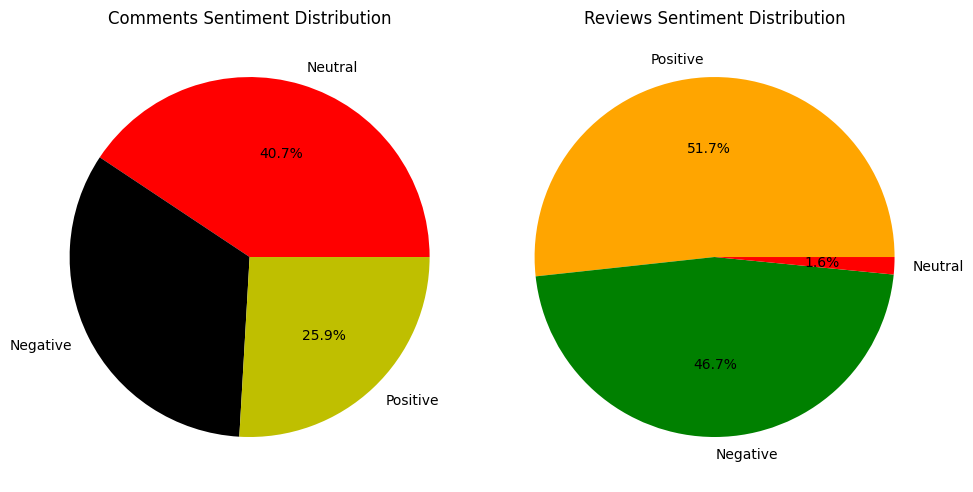

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,10)
ax1.pie(x=cvalues, labels=clables,autopct='%1.1f%%',colors=['r','k','y'])
ax1.set_title('Comments Sentiment Distribution')

ax2.pie(x=rvalues, labels=rlables,autopct='%1.1f%%',colors=['orange','g','r'])
ax2.set_title('Reviews Sentiment Distribution')

plt.tight_layout()
plt.show()


In [91]:
country_counts = df['Reviewer_Country'].value_counts()
country_counts[:20]

Reviewer_Country
United Kingdom          1728
United States            316
Australia                104
Canada                    89
Germany                   56
Switzerland               33
South Africa              29
Netherlands               25
Singapore                 25
Ireland                   24
France                    23
Spain                     18
Thailand                  18
Italy                     18
Sweden                    17
China                     17
United Arab Emirates      17
Belgium                   14
Greece                    13
Hong Kong                 13
Name: count, dtype: int64

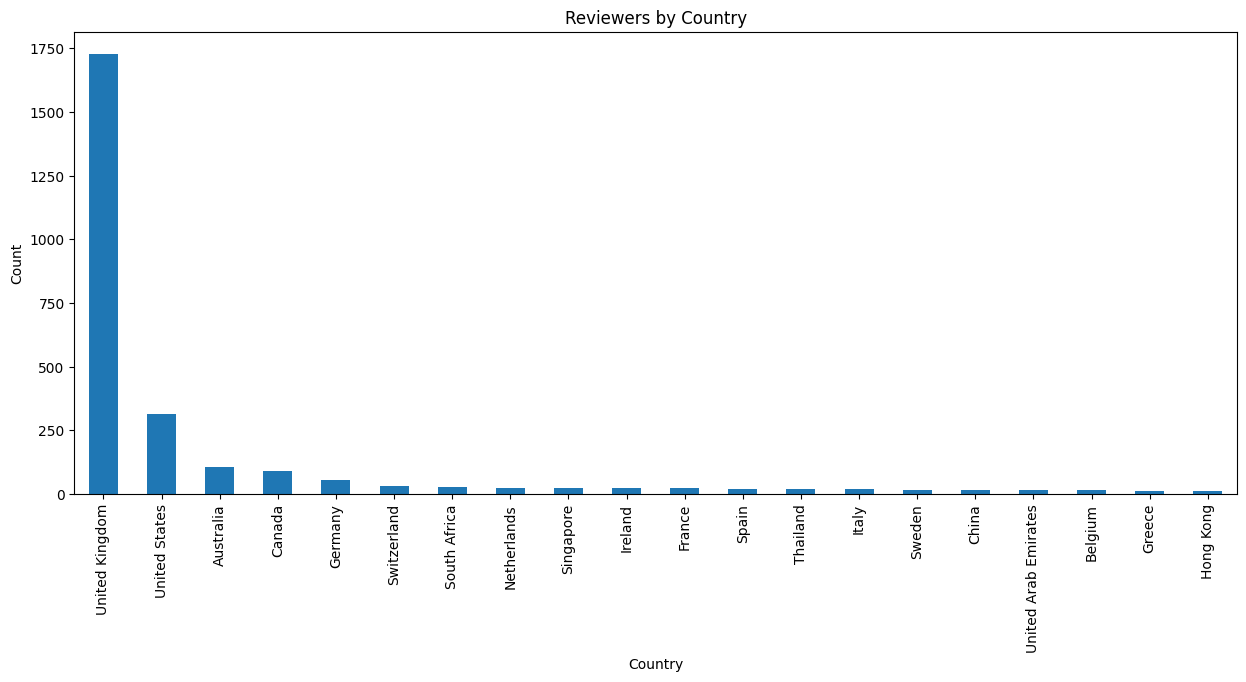

In [92]:
country_counts = df['Reviewer_Country'].value_counts()
plt.figure(figsize=(15, 6))
country_counts[:20].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Reviewers by Country')
plt.show()

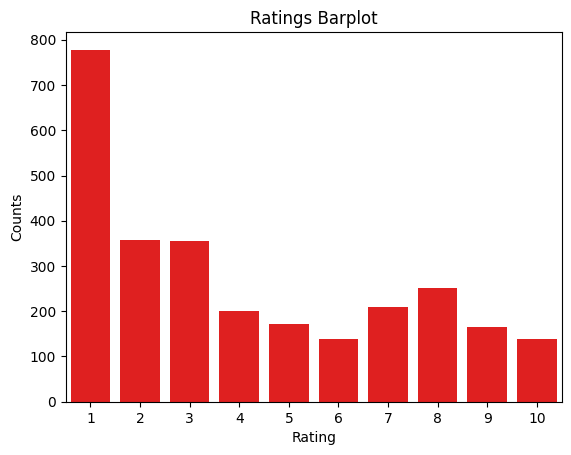

In [142]:
temp = df['Rating'].value_counts().sort_values(ascending=False)
lables,values =  temp.index,temp.values
sns.barplot(x=lables,y=values,color='r')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Ratings Barplot')
plt.show()

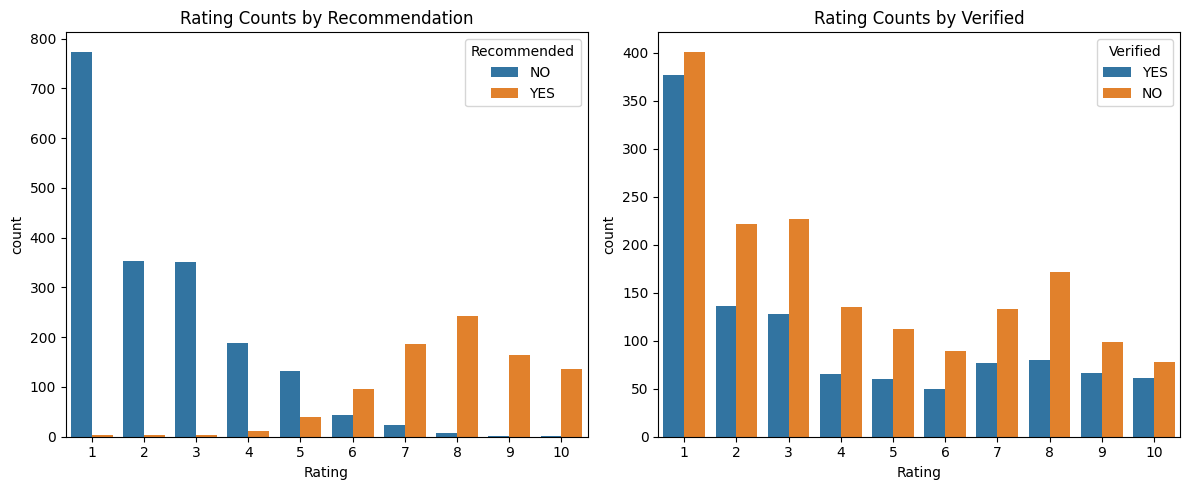

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Rating', hue='Recommended', data=df, ax=axs[0])
axs[0].set_title('Rating Counts by Recommendation')

sns.countplot(x='Rating', hue='Verified', data=df, ax=axs[1])
axs[1].set_title('Rating Counts by Verified')

plt.tight_layout()

In [114]:
round(df[(df['Rating']>=5) & (df['Recommended'] == 'YES')].shape[0] /df.shape[0]*100,2)

31.33

In [119]:
round(df[df['Rating']>=5].shape[0]/df.shape[0]*100,2)

38.89

In [147]:
df['Travel_Type'].value_counts().values

array([938, 829, 622, 378], dtype=int64)

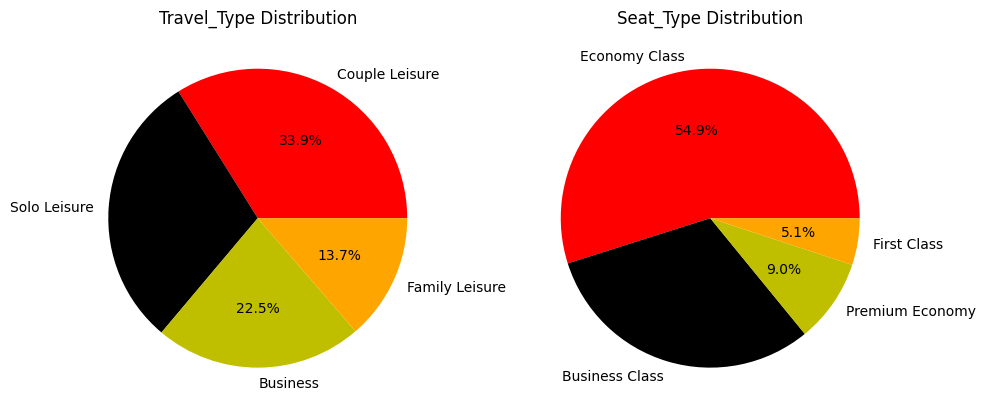

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,10)
ax1.pie(x=df['Travel_Type'].value_counts().values, labels=df['Travel_Type'].value_counts().index,autopct='%1.1f%%',colors=['r','k','y','orange'])
ax1.set_title('Travel_Type Distribution')

ax2.pie(x=df['Seat_Type'].value_counts().values, labels=df['Seat_Type'].value_counts().index,autopct='%1.1f%%',colors=['r','k','y','orange'])
ax2.set_title('Seat_Type Distribution')

plt.tight_layout()
plt.show()


In [154]:
df.columns

Index(['Review_Date', 'Review_Year', 'Review_Month', 'Flown_Date',
       'Flown_Year', 'Flown_Month', 'Comment', 'Full_review', 'Reviewer_Name',
       'Reviewer_Country', 'Origin', 'Destination', 'Aircraft', 'Travel_Type',
       'Seat_Type', 'Seat_Rating', 'Cabin_staff_service_Rating',
       'Food_Beverages_Rating', 'Inflight_Rating', 'Ground_service_Rating',
       'Value_Rating', 'Rating', 'Recommended', 'Verified', 'Target'],
      dtype='object')

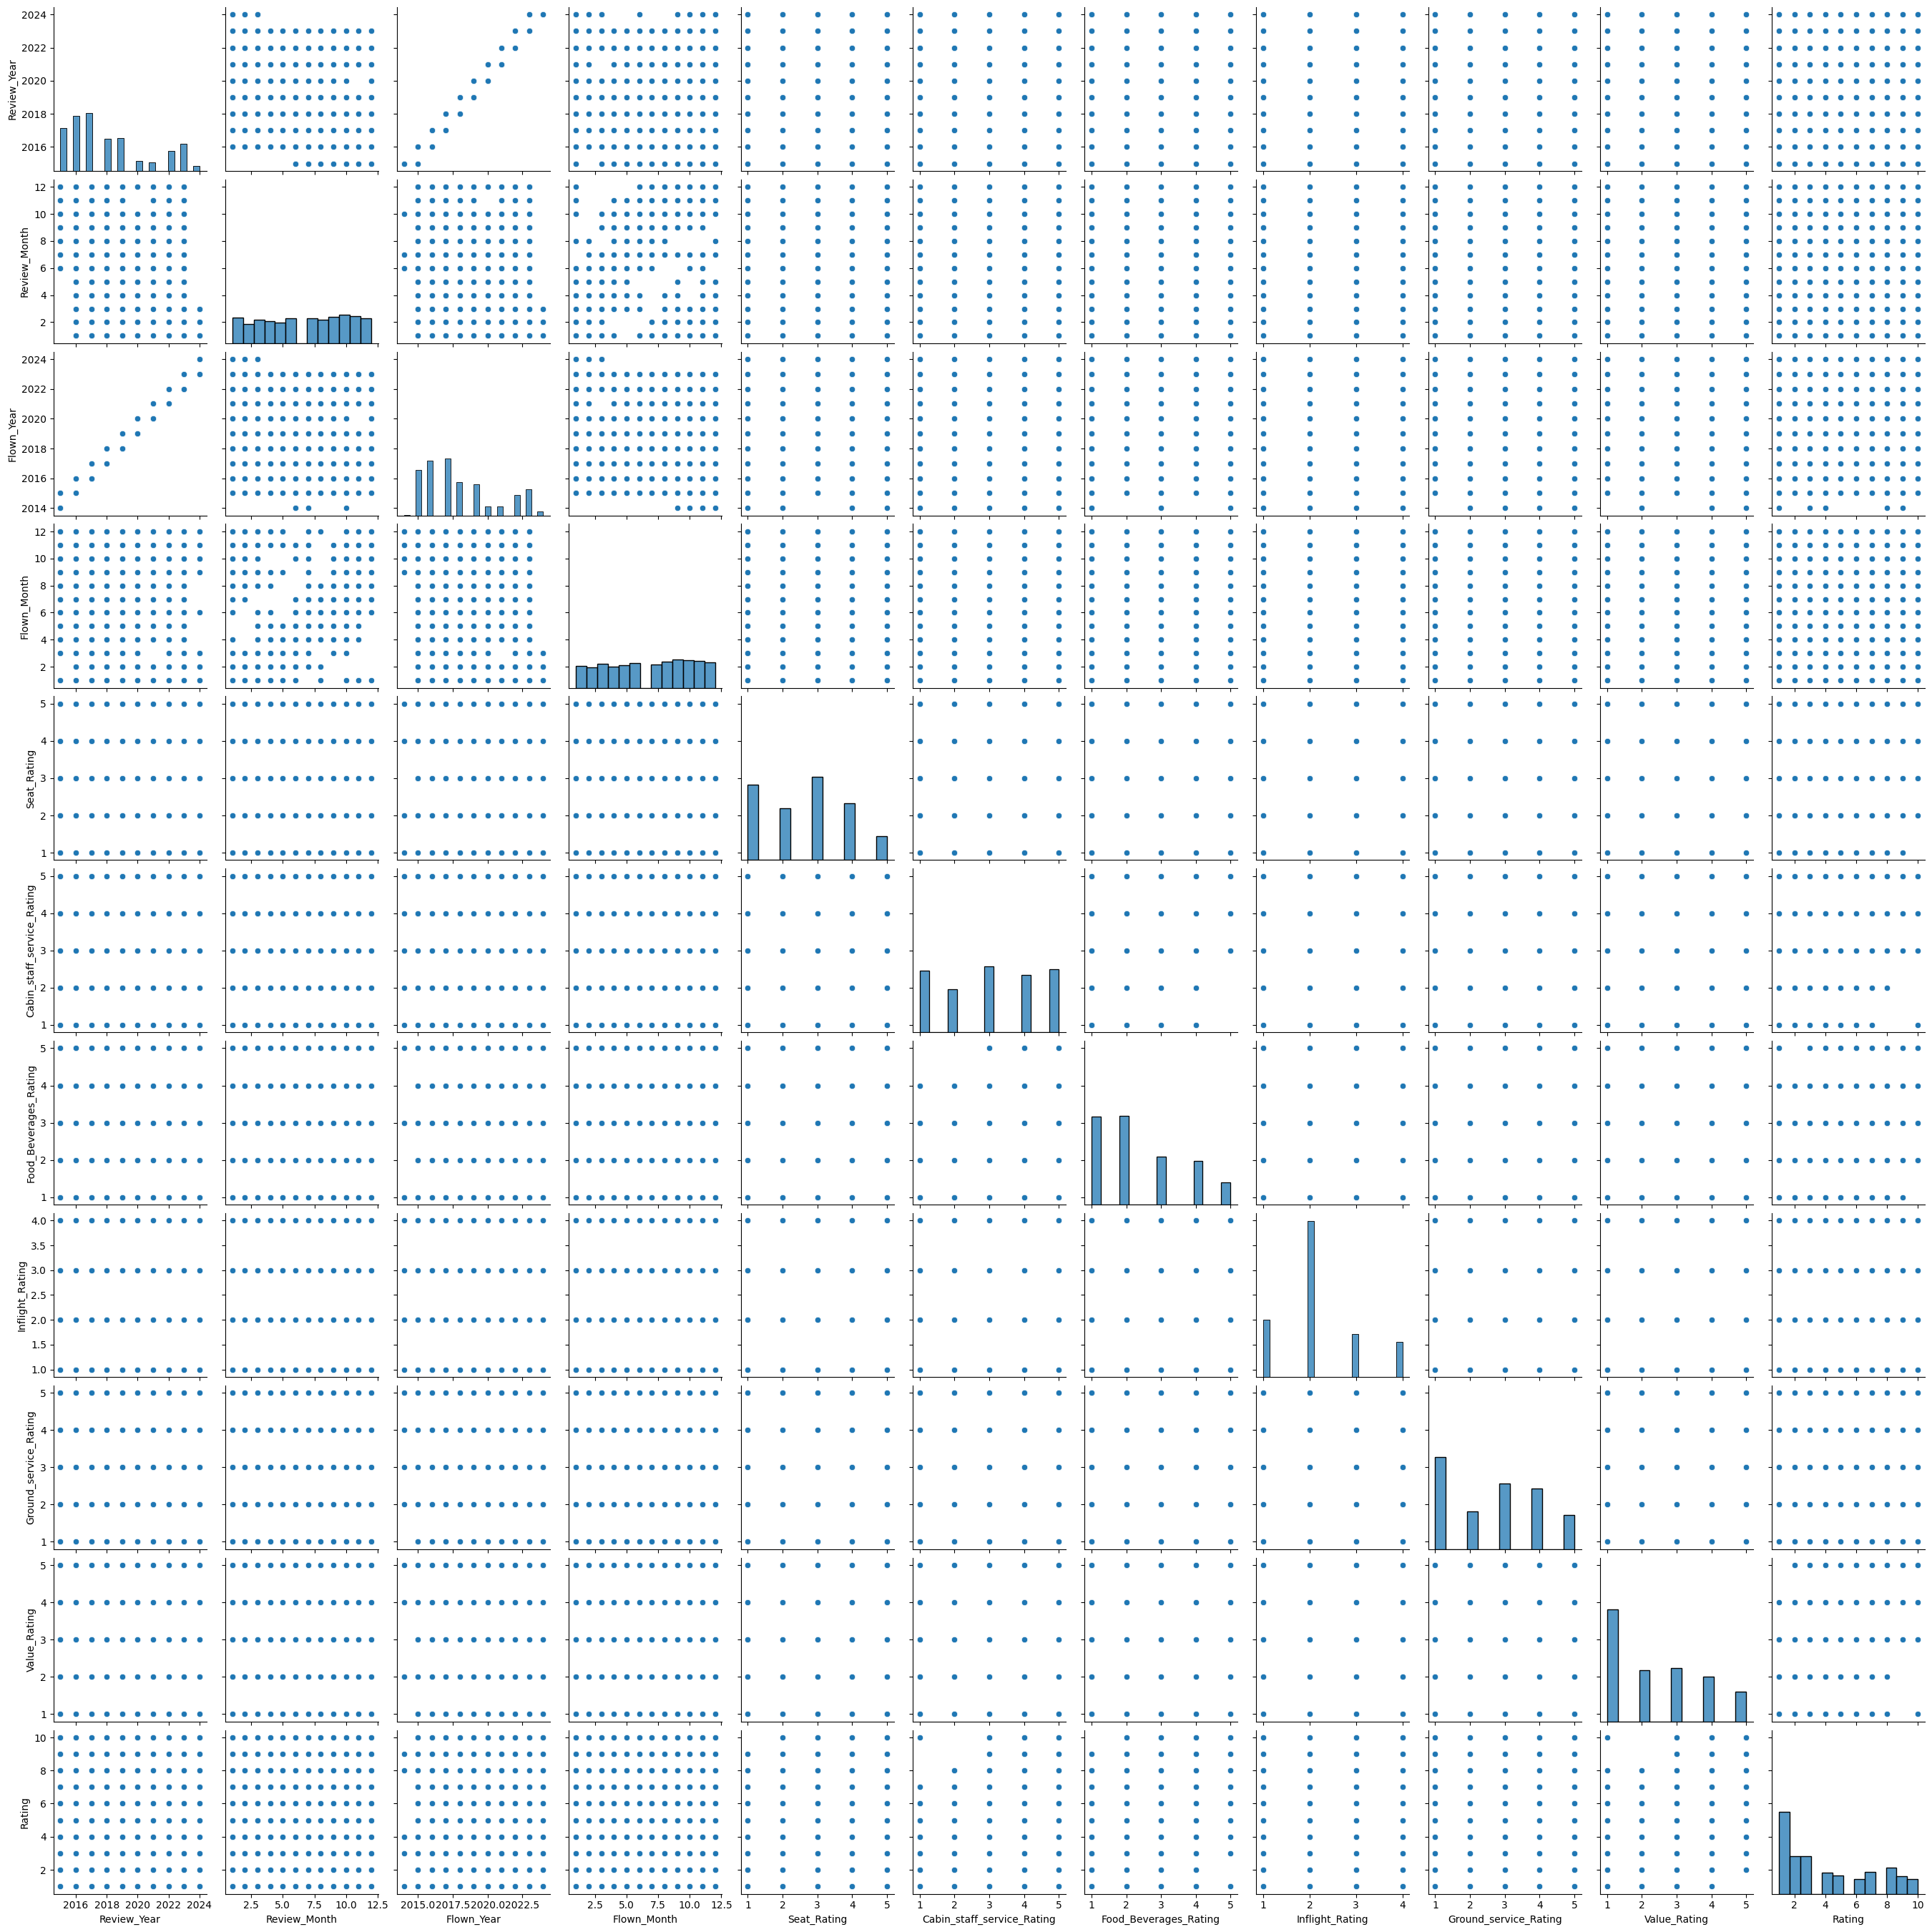

In [94]:
sns.pairplot(df[num_cols])

# n.Exporting

In [185]:
df.to_csv('Data/british_airways_ready.csv',index=False)